# <span style="color:orange">Presentación</span>

#### Nombre: Omar Sánchez Díaz
#### ID: 1094544
#### Asignatura: Laboratorio de Análisis Númerico
#### Profesor: Javier García Maimo
#### <span style="color:red">Tema:</span> Caso práctico

# <span style="color:orange">Detector y mapeado de nivel de seguridad de contraseñas</span>

## Indice:
* [Introducción](#first-bullet)
* [Criterios](#second-bullet)
* [Planteamiento](#third-bullet)
    * [Etapa 1 - Generador de contraseñas aleatorias](#four-bullet)
    * [Etapa 2 - Lista de contraseñas aleatorias](#five-bullet)
    * [Etapa 3 - Programa para analizar nivel de seguridad](#six-bullet)
    * [Etapa 4 - Fortaleza de la lista](#seven-bullet)
    * [Etapa 5 - Mapeado de la lista](#eight-bullet)
* [Conclusión](#nine-bullet)

#### Introducción <a class="anchor" id="first-bullet"></a>: 
Las contraseñas están quedando obsoletas, ya que todas pueden ser hackeadas con algoritmos de fuerza bruta usados por ciberdelincuentes, que consisten en insertar una contraseña tras otra, millones y trillones de veces hasta que inserte la adecuada. 

Sin embargo, las alternativas para refuerzo como la doble autentificación no han sido implementadas por muchas páginas webs por el momento. Por lo cual, busco diseñar un programa para que las páginas puedan detectar la fortaleza de la contraseña insertada por el usuario.

Pero, ¿A qué se refiere la fortaleza de una contraseña? Bueno, en base a lo comentado sobre los ataques de fuerza bruta, hay ciertos criterios con los que tiene que cumplir una contraseña para ser más "fuerte" contra los ataques de fuerza bruta. O en otras palabras, mientras más de estos criterios se cumplan, más tiempo va a tardar el ataque en dar frutos. Para esto Hive Systems diseño una tabla que muestra dicho criterio:

![title](https://content.spiceworksstatic.com/service.community/p/post_images/0000405784/5f4e51d9/attached_image/Time_it_takes_to_crack_a_password.jpg)

#### Criterios <a class="anchor" id="second-bullet"></a>
Para la contraseña ser valida debe cumplir con los siguientes criterios:
* Tener 8 o más caracteres
* Contener 1 o más números
* Contener 1 o más símbolos
* Contener 1 o más letras en mayúscula
* Contener 1 o más letras en minúscula

#### Planteamiento <a class="anchor" id="third-bullet"></a>
* **Etapa 1**: Diseñaremos un generador de contraseñas aleatorias, para hacer un caso practico de nuestro programa.
* **Etapa 2**: Creación de lista de contraseñas aleatorias para mapeado
* **Etapa 3**: Diseñaremos el programa para verificar la fortaleza de las diferentes contraseñas generadas aleatoriamente.
* **Etapa 4**: Verificaremos la fortaleza de la lista generada en la etapa 2
* **Etapa 5**: Mapearemos los resultados obtenidos de las diferentes contraseñas, para visualizar la cantidad de contraseñas erradas por parte del generador de contraseñas que actua como los usuarios.

### Etapa 1: Generador de contraseñas <a class="anchor" id="four-bullet"></a>

In [69]:
import string
import random

## Crea una lista de caracteres que usaremos
characters = list(string.ascii_letters + string.digits + "!@#$%^&*()")

def generador_aleatorio():
	## Longitud = Generara aleatoriamente la longitud de la contraseña, yendo de 0 a 15
	longitud = (random.randint(1,15))

	## Mezcla aleatoriamente los caracteres de la lista
	random.shuffle(characters)
	
	## Escoge caracteres de la lista aleatoriamente
	password = []
	for i in range(longitud):
		password.append(random.choice(characters))

	## Mezcla aleatoriamente la contraseña generada
	random.shuffle(password)

	## convertimos la contraseña a string
	psw = ("".join(password))
	return psw
    

### Etapa 2: Creación de lista de contraseñas aleatorias para mapeado <a class="anchor" id="five-bullet"></a>

In [74]:
##Iteraciones para el bucle
i = 0

##Lista de contraseñas
lista = []

##Bucle para añadir contraseñas aleatorias a la lista
##En este caso, usaremos 400 contraseñas para la lista
while (i < 400):
    lista.append(generador_aleatorio())
    i +=1

##Mostraremos la lista
print("Tamaño de la lista: ",len(lista))
print("\nLista aleatoria")
print(lista)

Tamaño de la lista:  400

Lista aleatoria
['vYxSxl1ewpX', 'LH0T3)e', 'u!%QrJc8np$^', 'AbmN*42HM2', '@s0', 'ePF', '$BP', 'G5Zh$lTI9', 'N)Lfg@Obuu', 'RvB@!t)#VWm1MR', 'Pw0qlm@%oQABzka', '32OQ', '#', 'G93', 'j7H%Uv@8b@5^i', 'O0CDF0&6acGwTD8', 'jKN&KTEH3^', 'Pc@&^U%H', 'kLw', '!AP^#2&a', 'zBq', 'oEvDj2lMh8V(U', '16ILEQ5kAD@L9', '$Rb', 'AN', 'e3FIA', 'Y@5f', 'Zg', '@mK2C', 'cTw#D1No', 'PDYjsUqxa', 'Ap4QRskQ^hvng', '612Xbo', 'dDEZl4cCgggrn', 'X2GddDD@', 'WYj9VuXD%U5469E', 's99YvE', '@(ZpKFmH9TZg&(', 'L!', 'lxQ64R(%$h7', 'QxhtoInk@', 'GvfRW(gt6d!8Z7', 'mbynTJE0jaBY', 'P57', 'w1MUNe', 'FlT', 'fT)$GLap#Gx', 'lrlt6BW', 'kDMngk$bsB#', 'eKVUVSqOObG1', '4uQE*Z%Pd%v', '7mB!SnR7r8^c1^', '6L0x#', '6q6^(tUHtwN', ')I%gz#!', '&dblk', 'usITYEq', 'T#', 'Ae)j', '98T7n*u', 'RI8qjL(bTS', 'Ia^YHv', 'F5k$', 'JUoEUXNJ', 'h', 'jtrWcdbRpCePb1', 'SbmmBP', '^J&z4!^', '$Wsud%XrQ9^A0', 'v^pn$AQ@', 'MDb*S8', 'pRbOC9)4c', 'B3!', 'PQg#uA', 'DDR', 'heD$Cgm^JQ', 'gPLVjm', 'ZDw2o82QBie*Dj1', 'd4', '3hgV', 'SOg6Y!XRK#S*', 'v

### Etapa 3: Algoritmo para verificar la fortaleza de las contraseñas generadas <a class="anchor" id="six-bullet"></a>

In [75]:
##Libreria para expresiones regulares
import re

##Para este programa, tendremos en cuenta el criterio mencionado anteriormente
def Verificar(password):

    ## Criterio longitud: 8 o mayor
    longitud_invalida = len(password) < 8

    ## Criterio números: 1 o más
    digitos_invalido = re.search(r"\d", password) is None

    ## Criterio mayuscula: 1 o más
    Mayuscula_invalida = re.search(r"[A-Z]", password) is None

    ## Criterio minuscula: 1 o más
    Minuscula_invalida = re.search(r"[a-z]", password) is None

    ## Criterio simbolos: 1 o más
    simbolos_invalido = re.search(r"\W", password) is None

    ## Validez
    password_valida = not ( longitud_invalida or digitos_invalido or Mayuscula_invalida or Minuscula_invalida or simbolos_invalido )

    ##En caso de que uno de los 5 criterios no se cumpla, arrojara "true" o verdadero, ya que el criterio es invalido.
    ##De igual forma, si se cumplen todos los 5 criterios (en fake), la contraseña es valida y arrojara "true" o verdadero.
    return {
        'Contraseña valida' : password_valida,
        'longitud invalida' : longitud_invalida,
        'digitos_invalido' : digitos_invalido,
        'Mayuscula_invalida' : Mayuscula_invalida,
        'Minuscula_invalida' : Minuscula_invalida,
        'simbolos_invalido' : simbolos_invalido,
    }

###  Algoritmo para realizar el mapeado

In [80]:
#Este metodo es el mismo que el anterior, pero su objetivo es catalogar las contraseñas en 1(validas), 0(invalidas)
#Para de este modo, poder realizar el mapeado de las mismas

def Verificar_valor(password):
    ## Criterio longitud: 8 o mayor
    longitud_invalida = len(password) < 8

    ## Criterio números: 1 o más
    digitos_invalido = re.search(r"\d", password) is None

    ## Criterio mayuscula: 1 o más
    Mayuscula_invalida = re.search(r"[A-Z]", password) is None

    ## Criterio minuscula: 1 o más
    Minuscula_invalida = re.search(r"[a-z]", password) is None

    ## Criterio simbolos: 1 o más
    simbolos_invalido = re.search(r"\W", password) is None

    ## Validez
    password_valida = not ( longitud_invalida or digitos_invalido or Mayuscula_invalida or Minuscula_invalida or simbolos_invalido )

    if password_valida:
        return 1
    else:
        return 0

### Etapa 4: Verificación de la fortaleza de las contraseñas generadas <a class="anchor" id="seven-bullet"></a>

In [85]:
##lista de contraseñas verificadas
verificados = []
u = 0
##Verificaremos cada contraseña de la lista generada aleatoriamente, y la añaderemos a la lista de verificados
for x in lista:
    ##Mostraremos 25 contraseñas para confirmar
    if u <26:
        u +=1
        print("Contraseña: ",x)
        print(Verificar(x))
    
    ##Agregaremos a la lista de verificados, el valor de las contraseñas
    ##1 si son validas, 0 si son invalidas
    verificados.append(Verificar_valor(x))

Contraseña:  vYxSxl1ewpX
{'Contraseña valida': False, 'longitud invalida': False, 'digitos_invalido': False, 'Mayuscula_invalida': False, 'Minuscula_invalida': False, 'simbolos_invalido': True}
Contraseña:  LH0T3)e
{'Contraseña valida': False, 'longitud invalida': True, 'digitos_invalido': False, 'Mayuscula_invalida': False, 'Minuscula_invalida': False, 'simbolos_invalido': False}
Contraseña:  u!%QrJc8np$^
{'Contraseña valida': True, 'longitud invalida': False, 'digitos_invalido': False, 'Mayuscula_invalida': False, 'Minuscula_invalida': False, 'simbolos_invalido': False}
Contraseña:  AbmN*42HM2
{'Contraseña valida': True, 'longitud invalida': False, 'digitos_invalido': False, 'Mayuscula_invalida': False, 'Minuscula_invalida': False, 'simbolos_invalido': False}
Contraseña:  @s0
{'Contraseña valida': False, 'longitud invalida': True, 'digitos_invalido': False, 'Mayuscula_invalida': True, 'Minuscula_invalida': False, 'simbolos_invalido': False}
Contraseña:  ePF
{'Contraseña valida': Fals

### Etapa 5: Mapeo de las contraseñas procesadas anteriormente <a class="anchor" id="eight-bullet"></a>

140
260


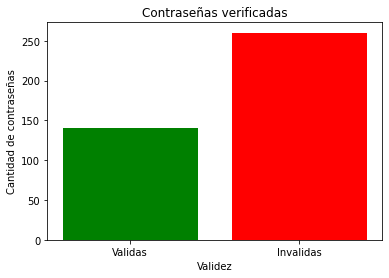

In [86]:
#Libreria para graficar
import matplotlib.pyplot as plt

#Listas para separar las contraseñas
validas = []
Invalidas = []

#Proceso de separación en base a su validez, 0 para invalidas, 1 para validas
for x in verificados:
    if x == 0:
        Invalidas.append(x)
    else:
        validas.append(x)

print(len(validas))
print(len(Invalidas))
#GRAFICA
x = ["Validas", "Invalidas"]
y = [len(validos), len(Invalidos)]
plt.bar(x, y, color = ['g','r'])
plt.title("Contraseñas verificadas")
plt.ylabel('Cantidad de contraseñas')
plt.xlabel('Validez')
plt.show()

### Conclusión<a class="anchor" id="nine-bullet"></a>
Con este proyecto hemos podido simular con un algoritmo aleatorio las contraseñas ingresadas en una página web. Dichas contraseñas las hemos verificado con el criterio anti-fuerza bruta planteado. Como hemos visto al final del proyecto, 140 contraseñas resultaron ser validas, <span style="color:red">lo que apenas es un 35 % de 400, una cifra preocupante, mientras que 260 resultaron ser invalidas, lo que resulta ser un 65%</span>. Lo que demuestra lo <span style="color:red">desprotegidas</span> que están las personas que se registren en páginas web que no implementen algoritmos como este que acabo de desarrollar.

Con esto me despido, y espero que hayan disfrutado de este proyecto tanto como lo he hecho yo.